<a href="https://colab.research.google.com/github/mwelland/ENGPYHS_3NM4/blob/main/Finite_volume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finite volume methods

The Finite Volume Method (aka the control-volume / volume-integral approach) is a technique that focusses on the *integral* of the quantity in a *control volume* surrounding a point.

This approach has advantages for conservation equations and different convergence properties for advective systems, e.g.: $\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$ and is common in computational fluid dynamics codes.

> Contrast this with the Finite Difference Method which focusses on writing derivatives in terms of relations to the surrounding points.



The control volume is constructed algorithmically through, e.g.: bisection of the lines joining nodes.

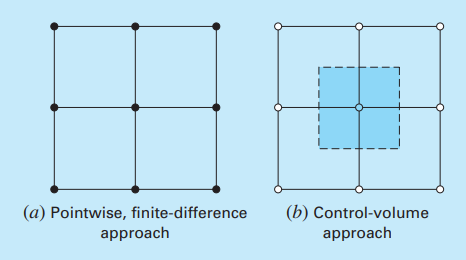

Many physics equations contain conservative term (divergence of a vector field $\vec{J}$). The integral of these terms can be transformed through Green's law (divergence theorem) into surface term:

$$\int_V \nabla \cdot \vec{J} dV = ∮\vec{J}\cdot \hat{n} dS$$

Convervation equations are very common in physics. When advection is present, the system can feature sharp gradients leading to numerical instabilities. Since Finite Volume focusses on the integral quantity (rather approximating the derivatives) it is more robust to these instabilities.

Some examples of conservation equations are:  

1. **Conservation of Mass**  
   - **Equation**: $ \frac{\partial \rho}{\partial t} + \nabla \cdot (\rho \mathbf{v}) = 0 $  
   - **Conserved Term**: Mass density \( \rho \)  
   - **Description**: Mass is conserved in a closed system, meaning it cannot be created or destroyed.

2. **Conservation of Momentum**  
   - **Equation**: $ \frac{\partial (\rho \mathbf{v})}{\partial t} + \nabla \cdot (\rho \mathbf{v} \otimes \mathbf{v} - \mathbf{\tau}) = \mathbf{F} $  
   - **Conserved Term**: Linear momentum $ \rho \mathbf{v} $  
   - **Description**: The total momentum of a system remains constant unless acted on by external forces.

3. **Conservation of Energy**  
   - **Equation**: $ \frac{\partial E}{\partial t} + \nabla \cdot (E \mathbf{v} + \lambda \nabla T) = \mathbf{v} \cdot \mathbf{F} $  
   - **Conserved Term**: Total energy \( E \) (including kinetic, potential, and internal energy)  
   - **Description**: Energy within a closed system remains constant over time.

5. **Conservation of Electric Charge**  
   - **Equation**: $ \frac{\partial \rho_e}{\partial t} + \nabla \cdot \mathbf{J} = 0 $  
   - **Conserved Term**: Electric charge \( \rho_e \)  
   - **Description**: Electric charge is conserved, meaning it cannot be created or destroyed.

5. **Conservation of dilute species**  
   - **Equation**: $ \frac{\partial n_i}{\partial t} + \nabla \cdot (n_i \mathbf{v} + D_i \nabla \mu_i) = \dot{Q} $  
   - **Conserved Term**: Abundance of species $i$ $ n_i $  
   - **Description**: Species are conserved through convective and diffusive transport.


The Finite volume method is also more flexible accounting for irregular / unstructured grids and differing materials again due to the focus on the change in integrated quantity through its surface.

## Example: Finite volume expression

Write the finite volume expression for node (4,2) for a plate with uneven mesh spacing in differing materials.

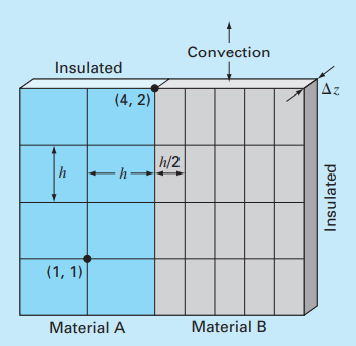

Consider the steady state heat equation: $$ -\nabla \cdot \vec{J} = 0$$ where $\vec{J} = -\lambda \nabla T$ is the heat flux.

The control volume is around (4,2) is depicted:

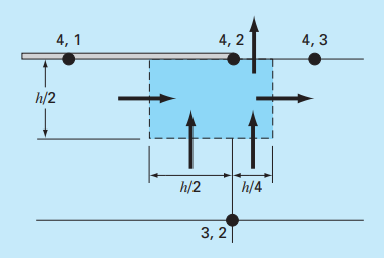

The sum of fluxes is:

$$0 = J_{left} \frac{h}{2}\Delta z - J_{right} \frac{h}{2} \Delta z + J_{lower\ a} \frac{h}{2} \Delta z + J_{lower\ b} \frac{h}{4} \Delta z - J_{convection} \frac{h}{4} \Delta z$$

with

$$\begin{align}
J_{left} &= - k_a \frac{T_{42} - T_{41}}{h} \\
J_{right}&= - k_b \frac{T_{43} - T_{42}}{\frac{h}{2}} \\
J_{lower\ a} &= - k_a \frac{T_{42} - T_{32}}{h} \\
J_{lower\ b} &= - k_b \frac{T_{42} - T_{32}}{h} \\
J_{conv} & = h \left(T_{amb} - T_{42} \right)
\end{align} $$

Substituting and simplifying we get:

$$
0 = \Delta z \left( -\frac{k_a}{2} (T_{42} - T_{41}) - k_b (T_{43} - T_{42}) - \frac{k_a}{2} (T_{42} - T_{32}) - \frac{k_b}{4} (T_{42} - T_{32}) - \frac{h^2}{4} (T_{amb} - T_{42}) \right).
$$

which is an algabreic expression for $T_{42}$, $T_{32}$, $T_{41}$. Once constructed over all the nodes we build a linear system!

Note that this look suspitiously familiar to finite difference! It is exactly finite difference for certain cases (regular square grids).

### Benefits
- **Flexibility**: Can handle complex geometries and irregular domains.
- **Conservation**: Inherently conserves quantities like mass, momentum, and energy.
- **Unstructured Meshes**: Works well with both structured and unstructured meshes.
- **Boundary Conditions**: Can apply boundary conditions non-invasively.
- **Robustness**: Provides numerical robustness through discrete maximum (minimum) principles.

### Drawbacks
- **Complexity**: Implementation can be more complex compared to simpler methods like finite difference.
- **Computational Cost**: Can be computationally expensive due to the need to solve large systems of equations.
- **Accuracy**: May require fine meshes to achieve high accuracy, increasing computational cost.
- **Numerical Diffusion**: Can introduce numerical diffusion, which may smear out sharp gradients.
- **Stability**: Requires careful consideration of stability criteria, such as the CFL condition.
